In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import math

# Figure S3 supplementary


## Defining equations

In [2]:

def I(t):
  p = 9E+4 # period
  alpha = 3
  a = 25
  f = -a*math.cos(2*(math.pi)*t/p) + a
  return f

def hposr(x): # THis is for all repressors Positive hill function
  N=1.3
  ka=0.6 #nM 
  hill = x**N/(ka**N+x**N)
  return hill
'''
a= hposr(10) # Just testing hposr function
print(a)
'''
def hnegr(x): # Thus is for repressors Negative hill function
  N=1.3
  ka=0.6 #nM 
  hill = 1/(1+(x**N/ka**N))
  return hill

def hposa(x): #This is for input signal Positive Hill function
  N=1.3
  ka=20.0 #nM 
  hill2 = x**N/(ka**N+x**N)
  #print(hill2)
  return hill2

#b=hposa(10.1) # Just testing hposa function
#print(b)

def func(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]

#print(func([50,50,0,0],0.001)) # Checking func


## Solving and plotting 

In [28]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,350000,3500000)
x = odeint(func,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]




/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


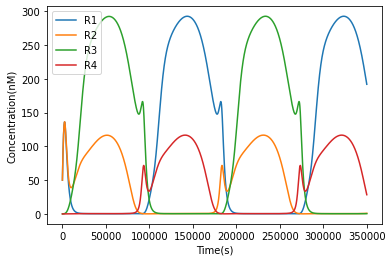

In [29]:

plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

 This was frequency multiplication with a sine input without any offset.

### The input signal plot

In [30]:
x = np.linspace(0, 350000, 35000000)
y2=[]
for t in x:
  y2.append(I(t))
#y = numpy.array([0 if math.floor(1/90000 * t) % 2 == 0 else 50 for t in x])




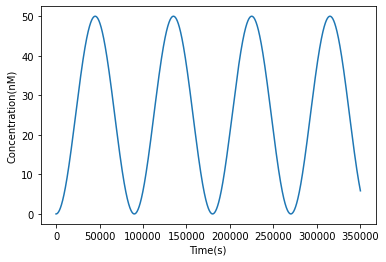

In [31]:

plt.plot(x,y2)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.show()

# Fig 4

## Defining functions

In [4]:
def I1(t):
  p = 9E+4 # period
  alpha = 6
  a = 25
  f = alpha -a*math.cos(2*(math.pi)*t/p) + a
  return f

def func1(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I1(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I1(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I1(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I1(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]



## Solving and Plotting

In [5]:
from scipy.integrate import odeint
import numpy as np

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,350000,3500000)
x1 = odeint(func1,x0,t1)

r11=x1[:,0]
r21=x1[:,1]
r31=x1[:,2]
r41=x1[:,3]


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


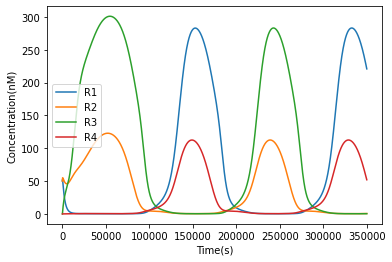

In [26]:
plt.plot(t1,r11)
plt.plot(t1,r21)
plt.plot(t1,r31)
plt.plot(t1,r41)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()



> This was a <u>frequency multiplier with an offset sine input.</u> 



### The input signal plot

In [6]:
x = np.linspace(0, 350000, 35000000)
y1=[]
for t in x:
  y1.append(I1(t))
#y = numpy.array([0 if math.floor(1/90000 * t) % 2 == 0 else 50 for t in x])




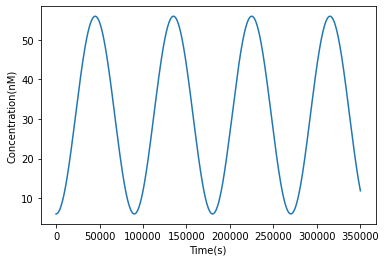

In [7]:

plt.plot(x,y1)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.show()

# Figure 3

In [8]:
import numpy as np

p=90000 # time period of step signal
inp=50 #nM input

def I2(t): # generation of input signal
  if math.floor(1/p * t) % 2 == 0 :
    return 0 
  else:
    return inp
  
'''
t1=np.linspace(0,100,1000)

for t in t1: # Just testing it out => Delete this later
  y=I2(t)
  print(y)
'''
def func2(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I2(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I2(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I2(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I2(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]



## Solving and Plotting

In [9]:
from scipy.integrate import odeint
import numpy as np
import math

x0=[50.0,50.0,0.0,0.0]
t2=np.linspace(0,350000,3500000)
x2 = odeint(func2,x0,t2)

r12=x2[:,0]
r22=x2[:,1]
r32=x2[:,2]
r42=x2[:,3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


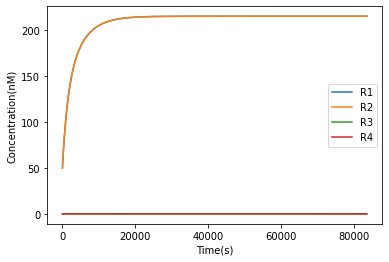

In [10]:
plt.plot(t2,r12)
plt.plot(t2,r22)
plt.plot(t2,r32)
plt.plot(t2,r42)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

Even though the input was fine, I couldn't reproduce the above figure. 

### The input signal plot

In [11]:
x = np.linspace(0, 700000, 70000000)
y=[]
for t in x:
  y.append(I2(t))
#y = numpy.array([0 if math.floor(1/90000 * t) % 2 == 0 else 50 for t in x])




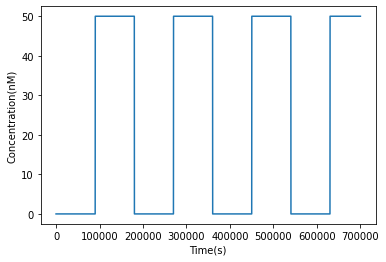

In [12]:

plt.plot(x,y)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.show()



> I couldn't get a plot here due to the peculiar nature of the <b>odeint</b> function which uses adjustable time steps. Since input was a periodic step function, I couldn't get the desired results.



# Figure 8 A.

## Defining functions

In [13]:
def I3(t):
  f=0.1
  return f

dic={'c':1}

def hnegr1(x,t): # Thus is for repressors Negative hill function
  N=1.3
  if t>50000 and t<60000:
    ka=4000
    hill = 1/(1+(x**N/ka**N))
    
    #print(ka)
    return hill
  else:
    ka=0.6
    hill = 1/(1+(x**N/ka**N))
    
    return hill

  
def hposa(x): #This is for input signal Positive Hill function
  N=1.3
  ka=20.0 #nM 
  hill2 = x**N/(ka**N+x**N)
  
  return hill2

#b=hposa(10.1) # Just testing hposa function
#print(b)

def func3(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I3(t))*hnegr1(r2,t) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I3(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I3(t))*hnegr(r4) + gamma*hnegr1(r1,t) - delr*r3
  dr4dt= alpha*hposa(I3(t))*hnegr1(r2,t) + gamma*hnegr1(r1,t)*hnegr1(r2,t) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]



## Solving and Plotting

In [14]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np
print(dic['c'])

x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,350000,3500000)
x = odeint(func3,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


1


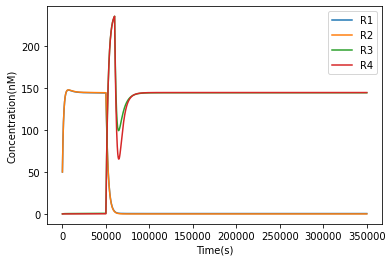

In [15]:
plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

This is a peculiarity of <b>odeint</b> function but the paper defined switching time wasn't giving results due to the changing time steps used in this function. I used a different time to achieve the same 'switching' result. The time was <b>50,000 to 60,000s.</b> 

Here, R1 and R2 high switches to R3 and R4 high.

# Figure 8 B)

## Defining functions

In [16]:

def func4(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I3(t))*hnegr(r2) + gamma*hnegr1(r3,t) - delr*r1
  dr2dt= alpha*hposa(I3(t))*hnegr1(r4,t) + gamma*hnegr1(r3,t)*hnegr1(r4,t) - delr*r2
  dr3dt= alpha*hposa(I3(t))*hnegr1(r4,t) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I3(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]



## Solving and Plotting

In [17]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np
print(dic['c'])

x0=[0.0,0.0,50.0,50.0]
t1=np.linspace(0,350000,3500000)
x = odeint(func4,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


1


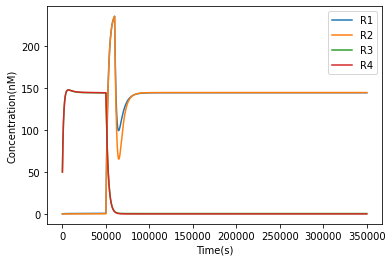

In [18]:
plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

Here, it switches from <u>R3 and R4 high to R1 and R2 high.</u>

# Figure 8 C)

## Defining functions

In [19]:
def I4(t):
  f=50
  return f

def func5(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I4(t))*hnegr1(r2,t) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I4(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I4(t))*hnegr(r4) + gamma*hnegr1(r1,t) - delr*r3
  dr4dt= alpha*hposa(I4(t))*hnegr1(r2,t) + gamma*hnegr1(r1,t)*hnegr1(r2,t) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]



## Solving and plotting

In [20]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[50.0,50.0,0.0,0.0]
t1=np.linspace(0,350000,3500000)
x = odeint(func5,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


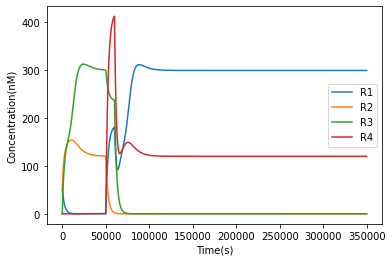

In [21]:
plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

Here, it switches from <u>R2 and R3 high to R1 and R4 high.</u>





# Figure 8 D)

## Defining functions

In [22]:
def I4(t):
  f=50
  return f

def func6(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I4(t))*hnegr(r2) + gamma*hnegr1(r3,t) - delr*r1
  dr2dt= alpha*hposa(I4(t))*hnegr1(r4,t) + gamma*hnegr1(r3,t)*hnegr1(r4,t) - delr*r2
  dr3dt= alpha*hposa(I4(t))*hnegr1(r4,t) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I4(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]



## Solving and plotting

In [23]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[0.0,0.0,50.0,50.0]
t1=np.linspace(0,350000,3500000)
x = odeint(func6,x0,t1)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


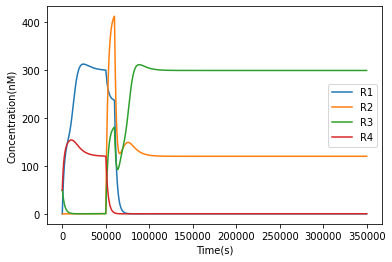

In [24]:
plt.plot(t1,r1)
plt.plot(t1,r2)
plt.plot(t1,r3)
plt.plot(t1,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

Here the system switches from <u>R1 and R4 high to R2 and R3 high.</u>

# Figure 5 Panel 3


## Defining functions

In [25]:
def I5(t):
  f=7.5
  return f

def func7(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I5(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I5(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I5(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I5(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]


## Solving and plotting

In [26]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[50.0,50.0,0.0,0.0]
t3=np.linspace(0,700000,7000000)
x = odeint(func7,x0,t3)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


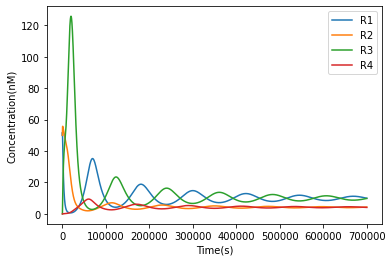

In [27]:
plt.plot(t3,r1)
plt.plot(t3,r2)
plt.plot(t3,r3)
plt.plot(t3,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

The simulation was run for fewer seconds but we can see the progression clearly.

# Figure 8 panel 2 

## Defining functions

In [28]:
def I6(t):
  f=5
  return f

def func8(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I6(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I6(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I6(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I6(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]


## Solving and plotting

In [29]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[50.0,50.0,0.0,0.0]
t3=np.linspace(0,700000,7000000)
x = odeint(func8,x0,t3)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


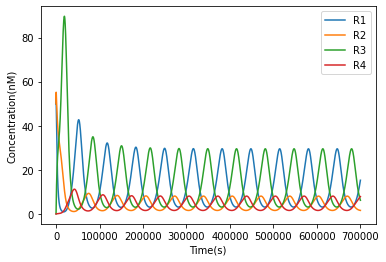

In [30]:
plt.plot(t3,r1)
plt.plot(t3,r2)
plt.plot(t3,r3)
plt.plot(t3,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

# Figure 8 panel 1 a

## Defining functions

In [31]:
def I7(t):
  f=0.1
  return f

def func9(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I7(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I7(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I7(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I7(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]


## Solving and plotting

In [32]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[50.0,50.0,0.0,0.0]
t3=np.linspace(0,700000,7000000)
x = odeint(func9,x0,t3)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


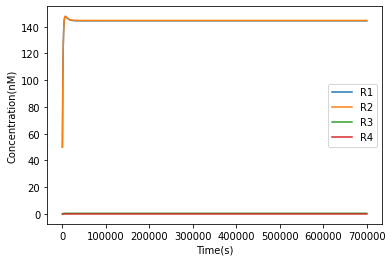

In [33]:
plt.plot(t3,r1)
plt.plot(t3,r2)
plt.plot(t3,r3)
plt.plot(t3,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

R2 high concentration

# Figure 8 Panel 1b

In [34]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[0.0,0.0,50.0,50.0]
t3=np.linspace(0,700000,7000000)
x = odeint(func9,x0,t3)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


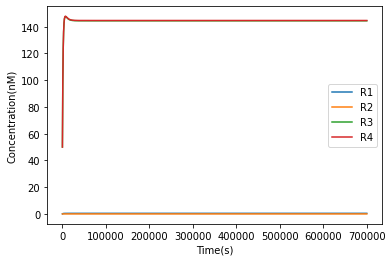

In [35]:
plt.plot(t3,r1)
plt.plot(t3,r2)
plt.plot(t3,r3)
plt.plot(t3,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

R4 high concentration

# Figure 8 Panel 4 c1

In [4]:
def I8(t):
  f=10
  return f

def func10(x,t):
  r1=x[0]
  r2=x[1]
  r3=x[2]
  r4=x[3]
  #parameter initialization
  ktl=6E-4
  delm=2.5E-3
  delr=4E-4
  beta=0.4 #nM/s
  Ptc=0.4 #nM/s
  alpha=ktl*beta/delm #for a1,b1,c1,d1
  gamma=ktl*Ptc/delm # For a2,b2,c2,d2

  # defining equations
  dr1dt= alpha*hposa(I8(t))*hnegr(r2) + gamma*hnegr(r3) - delr*r1
  dr2dt= alpha*hposa(I8(t))*hnegr(r4) + gamma*hnegr(r3)*hnegr(r4) - delr*r2
  dr3dt= alpha*hposa(I8(t))*hnegr(r4) + gamma*hnegr(r1) - delr*r3
  dr4dt= alpha*hposa(I8(t))*hnegr(r2) + gamma*hnegr(r1)*hnegr(r2) - delr*r4

  return [dr1dt,dr2dt,dr3dt,dr4dt]


## Solving and plotting

In [5]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[50.0,50.0,0.0,0.0]
t3=np.linspace(0,700000,7000000)
x = odeint(func10,x0,t3)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


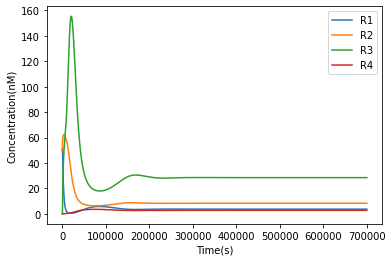

In [6]:
plt.plot(t3,r1)
plt.plot(t3,r2)
plt.plot(t3,r3)
plt.plot(t3,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

R3 high concentration

# Figure 8 panel 4c2

In [7]:
from scipy.integrate import odeint,solve_ivp,ode
import numpy as np


x0=[0.0,0.0,50.0,50.0]
t3=np.linspace(0,700000,7000000)
x = odeint(func10,x0,t3)

r1=x[:,0]
r2=x[:,1]
r3=x[:,2]
r4=x[:,3]


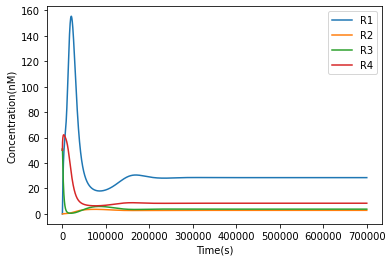

In [8]:
plt.plot(t3,r1)
plt.plot(t3,r2)
plt.plot(t3,r3)
plt.plot(t3,r4)
plt.xlabel('Time(s)')
plt.ylabel('Concentration(nM)')
plt.legend(['R1','R2','R3','R4'])
plt.show()

R1 high concentration